In [1]:
# loading in stuff we need
from astropy.io import fits
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.path import Path
from matplotlib.patches import PathPatch

# fits IO 

from matplotlib import rcParams
rcParams["savefig.dpi"] = 150
rcParams["figure.dpi"] = 150
rcParams["font.size"] = 12

from astropy.table import Table

from astropy.io import ascii
from astropy.table import Table, join

from scipy import stats



In [2]:
environment = ascii.read('EnvironmentMeasuresv05/EnvironmentMeasuresv05.dat')

environment

CATAID,RA,DEC,Z_TONRY,nQ,M_r,DistanceToEdge,Completeness,DistanceTo5nn,SurfaceDensity,SurfaceDensityErr,SurfaceDensityFlag,CountInCyl,CountInCylErr,CountInCylFlag,AGEDenPar,AGEErr,AGEScale,AGEDenParFlag
int64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,int64,float64,float64,int64,float64,float64,float64,int64
585591,183.49789499,-0.16766405,0.12561,5,-21.414,19.76427,0.9412,1.123,1.341,0.1082,0,2.125,1.4,0,0.953,5.477,1.2,0
585600,183.42823656,-0.02442331,0.12374,4,-19.557,18.19134,1.0,1.395,0.818,0.0003,0,2.0,1.4,0,0.654,3.873,1.2,0
585601,183.4293652,-0.05253383,0.02202,3,-15.582,3.36154,1.0,1.766,0.51,0.0356,0,1.0,1.0,0,1.133,5.385,1.4,0
585603,183.50219516,-0.16954766,0.09042,4,-18.695,14.36005,0.9412,5.495,0.056,0.0025,0,0.0,0.0,0,0.163,2.0,1.0,0
585614,183.71178167,-0.0960903,0.07659,4,-18.622,11.79069,1.0,2.356,0.287,0.0246,0,2.0,1.4,0,0.833,4.359,1.2,0
585625,183.74395576,-0.07660287,0.07586,5,-20.906,11.57156,0.9375,2.351,0.307,0.0261,0,1.067,1.0,0,0.411,3.873,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585561,183.36181934,-0.09670388,0.0226,5,-19.017,3.52317,1.0,1.783,0.5,0.0069,0,1.0,1.0,0,1.082,5.292,1.6,0
585562,183.38532557,-0.1233176,0.12647,5,-21.316,19.48716,1.0,0.608,4.3,1.0597,0,6.0,2.4,0,2.422,6.325,2.0,0


In [3]:
magphys = Table.read('MagPhys.fits')  
galaxyzoo = Table.read('galaxy_zoo_gama_cleaned.fits')  
groupgalaxies = Table.read('G3CGalv10.fits')  

galaxyzoo['CATAID'] = np.asarray(galaxyzoo['survey_id'],dtype='float')

In [4]:
magphys

CATAID,Z,f_mu_SFH_best_fit,f_mu_SFH_percentile2_5,f_mu_SFH_percentile16,f_mu_SFH_percentile50,f_mu_SFH_percentile84,f_mu_SFH_percentile97_5,f_mu_IR_best_fit,f_mu_IR_percentile2_5,f_mu_IR_percentile16,f_mu_IR_percentile50,f_mu_IR_percentile84,f_mu_IR_percentile97_5,mu_parameter_best_fit,mu_parameter_percentile2_5,mu_parameter_percentile16,mu_parameter_percentile50,mu_parameter_percentile84,mu_parameter_percentile97_5,tau_V_best_fit,tau_V_percentile2_5,tau_V_percentile16,tau_V_percentile50,tau_V_percentile84,tau_V_percentile97_5,sSFR_0_1Gyr_best_fit,sSFR_0_1Gyr_percentile2_5,sSFR_0_1Gyr_percentile16,sSFR_0_1Gyr_percentile50,sSFR_0_1Gyr_percentile84,sSFR_0_1Gyr_percentile97_5,mass_stellar_best_fit,mass_stellar_percentile2_5,mass_stellar_percentile16,mass_stellar_percentile50,mass_stellar_percentile84,mass_stellar_percentile97_5,L_dust_best_fit,L_dust_percentile2_5,L_dust_percentile16,L_dust_percentile50,L_dust_percentile84,L_dust_percentile97_5,T_C_ISM_best_fit,T_C_ISM_percentile2_5,T_C_ISM_percentile16,T_C_ISM_percentile50,T_C_ISM_percentile84,T_C_ISM_percentile97_5,T_W_BC_best_fit,T_W_BC_percentile2_5,T_W_BC_percentile16,T_W_BC_percentile50,T_W_BC_percentile84,T_W_BC_percentile97_5,xi_C_tot_best_fit,xi_C_tot_percentile2_5,xi_C_tot_percentile16,xi_C_tot_percentile50,xi_C_tot_percentile84,xi_C_tot_percentile97_5,xi_PAH_tot_best_fit,xi_PAH_tot_percentile2_5,xi_PAH_tot_percentile16,xi_PAH_tot_percentile50,xi_PAH_tot_percentile84,xi_PAH_tot_percentile97_5,xi_MIR_tot_best_fit,xi_MIR_tot_percentile2_5,xi_MIR_tot_percentile16,xi_MIR_tot_percentile50,xi_MIR_tot_percentile84,xi_MIR_tot_percentile97_5,xi_W_tot_best_fit,xi_W_tot_percentile2_5,xi_W_tot_percentile16,xi_W_tot_percentile50,xi_W_tot_percentile84,xi_W_tot_percentile97_5,tau_V_ISM_best_fit,tau_V_ISM_percentile2_5,tau_V_ISM_percentile16,tau_V_ISM_percentile50,tau_V_ISM_percentile84,tau_V_ISM_percentile97_5,mass_dust_best_fit,mass_dust_percentile2_5,mass_dust_percentile16,mass_dust_percentile50,mass_dust_percentile84,mass_dust_percentile97_5,SFR_0_1Gyr_best_fit,SFR_0_1Gyr_percentile2_5,SFR_0_1Gyr_percentile16,SFR_0_1Gyr_percentile50,SFR_0_1Gyr_percentile84,SFR_0_1Gyr_percentile97_5,metalicity_Z_Zo_percentile2_5,metalicity_Z_Zo_percentile16,metalicity_Z_Zo_percentile50,metalicity_Z_Zo_percentile84,metalicity_Z_Zo_percentile97_5,tform_percentile2_5,tform_percentile16,tform_percentile50,tform_percentile84,tform_percentile97_5,gamma_percentile2_5,gamma_percentile16,gamma_percentile50,gamma_percentile84,gamma_percentile97_5,tlastb_percentile2_5,tlastb_percentile16,tlastb_percentile50,tlastb_percentile84,tlastb_percentile97_5,agem_percentile2_5,agem_percentile16,agem_percentile50,agem_percentile84,agem_percentile97_5,ager_percentile2_5,ager_percentile16,ager_percentile50,ager_percentile84,ager_percentile97_5,sfr16_percentile2_5,sfr16_percentile16,sfr16_percentile50,sfr16_percentile84,sfr16_percentile97_5,sfr17_percentile2_5,sfr17_percentile16,sfr17_percentile50,sfr17_percentile84,sfr17_percentile97_5,sfr18_percentile2_5,sfr18_percentile16,sfr18_percentile50,sfr18_percentile84,sfr18_percentile97_5,sfr19_percentile2_5,sfr19_percentile16,sfr19_percentile50,sfr19_percentile84,sfr19_percentile97_5,sfr29_percentile2_5,sfr29_percentile16,sfr29_percentile50,sfr29_percentile84,sfr29_percentile97_5,fb16_percentile2_5,fb16_percentile16,fb16_percentile50,fb16_percentile84,fb16_percentile97_5,fb17_percentile2_5,fb17_percentile16,fb17_percentile50,fb17_percentile84,fb17_percentile97_5,fb18_percentile2_5,fb18_percentile16,fb18_percentile50,fb18_percentile84,fb18_percentile97_5,fb19_percentile2_5,fb19_percentile16,fb19_percentile50,fb19_percentile84,fb19_percentile97_5,fb29_percentile2_5,fb29_percentile16,fb29_percentile50,fb29_percentile84,fb29_percentile97_5,URL_SED,URL_FIT,URL_PNG
,,,,,,,,,,,,,,,,,,,,,,,,,,1 / yr,dex(yr^-1),dex(yr^-1),dex(yr^-1),dex(yr^-1),dex(yr^-1),Msun,dex(Msun),dex(Msun),dex(Msun),dex(Msun),dex(Msun),Lsun,dex(Lsun),dex(Lsun),dex(Lsun),dex(Lsun),dex(Lsun),K,K,K,K,K,K,K,K,K,K,K,K,,

In [5]:
groupgalaxies

CATAID,RA,Dec,Z,Rpetro,DM_100_25_75,SURVEY_CODE,SigErr,GroupID,RankIterCen,SepIterCen,CoSepIterCen,AngSepIterCen,RankBCG,SepBCG,CoSepBCG,AngSepBCG,RankCen,SepCen,CoSepCen,AngSepCen
,deg,deg,,mag,mag,,km / s,,,arcsec,Mpc / h,Mpc / h,,arcsec,Mpc / h,Mpc / h,,arcsec,Mpc / h,Mpc / h
int32,float64,float64,float32,float32,float32,int16,float32,int32,int16,float32,float32,float32,int16,float32,float32,float32,int16,float32,float32,float32
6802,174.00598431,0.72093463,0.051813804,18.622816,36.044518,5,24.158697,0,-999,-999.0,-999.0,-999.0,-999,-999.0,-999.0,-999.0,-999,-999.0,-999.0,-999.0
6803,174.02164811,0.75488515,0.16169676,19.219088,38.683414,5,40.067787,0,-999,-999.0,-999.0,-999.0,-999,-999.0,-999.0,-999.0,-999,-999.0,-999.0,-999.0
6804,174.0920547,0.67409614,0.2202978,19.3412,39.43489,5,24.125309,0,-999,-999.0,-999.0,-999.0,-999,-999.0,-999.0,-999.0,-999,-999.0,-999.0,-999.0
6805,174.02235464,0.70253177,0.33400568,19.301096,40.477726,5,58.761257,203003,2,12.394894,0.056041796,0.0420283,2,12.394894,0.056041796,0.0420283,2,8.251231,0.037306797,0.027978072
6806,174.02280711,0.70594494,0.33285415,18.544878,40.468914,5,24.662685,203003,1,0.0,0.0,0.0,1,0.0,0.0,0.0,1,4.1436634,0.018735,0.014050233
6807,174.07693167,0.64402556,0.38845164,19.627243,40.86566,5,45.5613,0,-999,-999.0,-999.0,-999.0,-999,-999.0,-999.0,-999.0,-999,-999.0,-999.0,-999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2566471,36.556764,-5.654681,0.3555094,19.42052,40.63739,5,35.506996,0,-999,-999.0,-999.0,-999.0,-999,-999.0,-999.0,-999.0,-999,-999.0,-999.0,-999.0


In [6]:
galaxyzoo

region,subject_id,survey_id,zooniverse_id,features_total,edgeon_total,bar_total,spiral_total,bulge_total,spiralwinding_total,spiralnumber_total,bulgeshape_total,round_total,mergers_total,oddtype_total,discuss_total,odd_total,features_smooth_frac,features_features_frac,features_star_or_artifact_frac,edgeon_yes_frac,edgeon_no_frac,bar_bar_frac,bar_no_bar_frac,spiral_spiral_frac,spiral_no_spiral_frac,bulge_no_bulge_frac,bulge_obvious_frac,bulge_dominant_frac,spiralwinding_tight_frac,spiralwinding_medium_frac,spiralwinding_loose_frac,spiralnumber_1_frac,spiralnumber_2_frac,spiralnumber_3_frac,spiralnumber_4_frac,spiralnumber_more_than_4_frac,bulgeshape_rounded_frac,bulgeshape_boxy_frac,bulgeshape_no_bulge_frac,round_completely_round_frac,round_in_between_frac,round_cigar_shaped_frac,mergers_merging_frac,mergers_tidal_debris_frac,mergers_both_frac,mergers_neither_frac,oddtype_none_frac,oddtype_ring_frac,oddtype_lens_or_arc_frac,oddtype_irregular_frac,oddtype_other_frac,oddtype_dust_lane_frac,oddtype_overlapping_frac,discuss_yes_frac,discuss_no_frac,CATAID
bytes6,bytes24,bytes7,bytes10,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
gama09,5857c4a3d369fd0040000001,598860,AGZ000dir0,24.22130599640355,1.7395928847607092,1.7395928847607092,1.7395928847607092,1.7395928847607092,0.0,0.0,0.0,21.4838099398336,23.223402824594306,6.478225992933209,24.221305996403547,23.22340282459431,0.8869798326739101,0.07182077155620795,0.04119939576988185,0.0,1.0,0.14388693913485856,0.8561130608651415,0.0,1.0,0.14388693913485856,0.13737897860831294,0.7187340822568286,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.04654667876882854,0.9534533212311714,0.0,0.0,0.0,0.0,1.0,0.8982460515841436,0.06311610283868091,0.0,0.0,0.038637845577175416,0.0,0.0,0.04128596534590179,0.9587140346540982,598860.0
gama09,5857c4a3d369fd0040000003,598875,AGZ000dir2,30.26078678485824,2.647863871684903,2.4779669874054298,2.4779669874054298,2.4779669874054298,1.0,1.0,0.16989688427947328,24.96907467306071,27.616938544745615,9.125830859090332,30.260786784858244,27.616938544745615,0.82512972483434,0.08750148799864746,0.0873687871670125,0.06416375331688165,0.9358362466831184,0.0,1.0,0.4035566273007761,0.5964433726992239,0.4035566273007761,0.4035566273007761,0.19288674539844775,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.009571179422221666,0.9904288205777784,0.0,0.0510150817658332,0.03620966163138526,0.0,0.9127752566027815,0.811858174053503,0.0,0.0,0.0,0.18814182594649703,0.0,0.0,0.00789746464299786,0.9921025353570021,598875.0
gama09,5857c4a3d369fd0040000005,598877,AGZ000dir1,24.83652016836818,0.489288189231712,0.2503046955289972,0.2503046955289972,0.2503046955289972,0.0,0.0,0.23898349370271485,22.489608576101148,22.978896765332863,7.522414780805664,24.83652016836818,22.97889676533286,0.9055056192913827,0.019700351978248144,0.07479402873036915,0.4884309471642274,0.5115690528357726,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.48509024655205796,0.5149097534479421,0.0,0.05391831933254118,0.007888954343574102,0.0,0.9381927263238847,0.8867588202793433,0.0,0.0,0.024098573759847662,0.057373087705513005,0.0,0.031769518255296114,0.0,1.0,598877.0
gama09,5857c4a3d369fd0040000007,598888,AGZ000dir4,30.87525040915166,5.47796698740543,4.47796698740543,4.47796698740543,4.47796698740543,0.0,0.0,1.0,23.486246367569994,28.964213354975424,12.066044787761523,30.875250409151658,28.964213354975424,0.7606819720110995,0.1774225930093742,0.06189543497952618,0.18254947543479766,0.8174505245652024,0.0,1.0,0.0,1.0,0.0,0.9466312515534682,0.053368748446531944,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.1451436864210536

# Joining Tables

here we are putting everything into big single table.

In [7]:
gama = join(magphys, galaxyzoo, join_type='right', keys='CATAID')
gama2 = join(gama, environment, join_type='right', keys='CATAID')

In [8]:
gama2

CATAID,Z,f_mu_SFH_best_fit,f_mu_SFH_percentile2_5,f_mu_SFH_percentile16,f_mu_SFH_percentile50,f_mu_SFH_percentile84,f_mu_SFH_percentile97_5,f_mu_IR_best_fit,f_mu_IR_percentile2_5,f_mu_IR_percentile16,f_mu_IR_percentile50,f_mu_IR_percentile84,f_mu_IR_percentile97_5,mu_parameter_best_fit,mu_parameter_percentile2_5,mu_parameter_percentile16,mu_parameter_percentile50,mu_parameter_percentile84,mu_parameter_percentile97_5,tau_V_best_fit,tau_V_percentile2_5,tau_V_percentile16,tau_V_percentile50,tau_V_percentile84,tau_V_percentile97_5,sSFR_0_1Gyr_best_fit,sSFR_0_1Gyr_percentile2_5,sSFR_0_1Gyr_percentile16,sSFR_0_1Gyr_percentile50,sSFR_0_1Gyr_percentile84,sSFR_0_1Gyr_percentile97_5,mass_stellar_best_fit,mass_stellar_percentile2_5,mass_stellar_percentile16,mass_stellar_percentile50,mass_stellar_percentile84,mass_stellar_percentile97_5,L_dust_best_fit,L_dust_percentile2_5,L_dust_percentile16,L_dust_percentile50,L_dust_percentile84,L_dust_percentile97_5,T_C_ISM_best_fit,T_C_ISM_percentile2_5,T_C_ISM_percentile16,T_C_ISM_percentile50,T_C_ISM_percentile84,T_C_ISM_percentile97_5,T_W_BC_best_fit,T_W_BC_percentile2_5,T_W_BC_percentile16,T_W_BC_percentile50,T_W_BC_percentile84,T_W_BC_percentile97_5,xi_C_tot_best_fit,xi_C_tot_percentile2_5,xi_C_tot_percentile16,xi_C_tot_percentile50,xi_C_tot_percentile84,xi_C_tot_percentile97_5,xi_PAH_tot_best_fit,xi_PAH_tot_percentile2_5,xi_PAH_tot_percentile16,xi_PAH_tot_percentile50,xi_PAH_tot_percentile84,xi_PAH_tot_percentile97_5,xi_MIR_tot_best_fit,xi_MIR_tot_percentile2_5,xi_MIR_tot_percentile16,xi_MIR_tot_percentile50,xi_MIR_tot_percentile84,xi_MIR_tot_percentile97_5,xi_W_tot_best_fit,xi_W_tot_percentile2_5,xi_W_tot_percentile16,xi_W_tot_percentile50,xi_W_tot_percentile84,xi_W_tot_percentile97_5,tau_V_ISM_best_fit,tau_V_ISM_percentile2_5,tau_V_ISM_percentile16,tau_V_ISM_percentile50,tau_V_ISM_percentile84,tau_V_ISM_percentile97_5,mass_dust_best_fit,mass_dust_percentile2_5,mass_dust_percentile16,mass_dust_percentile50,mass_dust_percentile84,mass_dust_percentile97_5,SFR_0_1Gyr_best_fit,SFR_0_1Gyr_percentile2_5,SFR_0_1Gyr_percentile16,SFR_0_1Gyr_percentile50,SFR_0_1Gyr_percentile84,SFR_0_1Gyr_percentile97_5,metalicity_Z_Zo_percentile2_5,metalicity_Z_Zo_percentile16,metalicity_Z_Zo_percentile50,metalicity_Z_Zo_percentile84,metalicity_Z_Zo_percentile97_5,tform_percentile2_5,tform_percentile16,tform_percentile50,tform_percentile84,tform_percentile97_5,gamma_percentile2_5,gamma_percentile16,gamma_percentile50,gamma_percentile84,gamma_percentile97_5,tlastb_percentile2_5,tlastb_percentile16,tlastb_percentile50,tlastb_percentile84,tlastb_percentile97_5,agem_percentile2_5,agem_percentile16,agem_percentile50,agem_percentile84,agem_percentile97_5,ager_percentile2_5,ager_percentile16,ager_percentile50,ager_percentile84,ager_percentile97_5,sfr16_percentile2_5,sfr16_percentile16,sfr16_percentile50,sfr16_percentile84,sfr16_percentile97_5,sfr17_percentile2_5,sfr17_percentile16,sfr17_percentile50,sfr17_percentile84,sfr17_percentile97_5,sfr18_percentile2_5,sfr18_percentile16,sfr18_percentile50,sfr18_percentile84,sfr18_percentile97_5,sfr19_percentile2_5,sfr19_percentile16,sfr19_percentile50,sfr19_percentile84,sfr19_percentile97_5,sfr29_percentile2_5,sfr29_percentile16,sfr29_percentile50,sfr29_percentile84,sfr29_percentile97_5,fb16_percentile2_5,fb16_percentile16,fb16_percentile50,fb16_percentile84,fb16_percentile97_5,fb17_percentile2_5,fb17_percentile16,fb17_percentile50,fb17_percentile84,fb17_percentile97_5,fb18_percentile2_5,fb18_percentile16,fb18_percentile50,fb18_percentile84,fb18_percentile97_5,fb19_percentile2_5,fb19_percentile16,fb19_percentile50,fb19_percentile84,fb19_percentile97_5,fb29_percentile2_5,fb29_percentile16,fb29_percentile50,fb29_percentile84,fb29_percentile97_5,URL_SED,URL_FIT,URL_PNG,region,subject_id,survey_id,zooniverse_id,features_total,edgeon_total,bar_total,spiral_total,bulge_total,spiralwinding_total,spiralnumber_total,bulgeshape_total,round_total,mergers_total,oddtype_total,discuss_total,odd_tota

In [9]:
# all spirals
m0 = np.where(
    (gama['Z']<0.08)
    & (np.log10(gama['mass_stellar_best_fit']) > 9.)
    & (gama['spiral_spiral_frac']>0.3)
    )

# one-armed spirals
m1 = np.where(
    (gama['Z']<0.08)
    & (np.log10(gama['mass_stellar_best_fit']) > 9.)
    & (gama['spiral_spiral_frac']>0.3)
    & (gama['spiralnumber_1_frac']>0.5) 
    & (gama['spiralnumber_1_frac']<1) 
     )

# two-armed spirals
m2 = np.where(
    (gama['Z']<0.08)
    & (np.log10(gama['mass_stellar_best_fit']) > 9.)
    & (gama['spiral_spiral_frac']>0.3)
    & (gama['spiralnumber_2_frac']>0.5) 
    & (gama['spiralnumber_2_frac']<1) 
     )

# three-armed spirals
m3 = np.where(
    (gama['Z']<0.08)
    & (np.log10(gama['mass_stellar_best_fit']) > 9.)
    & (gama['spiral_spiral_frac']>0.3)
    & (gama['spiralnumber_3_frac']>0.5) 
    & (gama['spiralnumber_3_frac']<1) 
     )

# four-armed spirals that are in a group
m4 = np.where(
    (gama2['Z']<0.08)
    & (np.log10(gama2['mass_stellar_best_fit']) > 9.)
    & (gama2['spiral_spiral_frac']>0.3)
    & (gama2['spiralnumber_4_frac']>0.5) 
    & (gama2['spiralnumber_4_frac']<1) 
     )

# 5+-armed spirals that are in a group
m5 = np.where(
    (gama2['Z']<0.08)
    & (np.log10(gama2['mass_stellar_best_fit']) > 9.)
    & (gama2['spiral_spiral_frac']>0.3)
    & (gama2['spiralnumber_more_than_4_frac']>0.5) 
    & (gama2['spiralnumber_more_than_4_frac']<1) 
     )

# all spirals but m1
m01 = np.where(
    (gama['Z']<0.08)
    & (np.log10(gama['mass_stellar_best_fit']) > 9.)
    & (gama['spiral_spiral_frac']>0.3)
    & (gama['spiralnumber_1_frac']<0.5)
        )

# all spirals but m2
m02 = np.where(
    (gama['Z']<0.08)
    & (np.log10(gama['mass_stellar_best_fit']) > 9.)
    & (gama['spiral_spiral_frac']>0.3)
    & (gama['spiralnumber_2_frac']<0.5)
        )

# all spirals but m3
m03 = np.where(
    (gama['Z']<0.08)
    & (np.log10(gama['mass_stellar_best_fit']) > 9.)
    & (gama['spiral_spiral_frac']>0.3)
    & (gama['spiralnumber_3_frac']<0.5)
        )

# all spirals but m4
m04 = np.where(
    (gama['Z']<0.08)
    & (np.log10(gama['mass_stellar_best_fit']) > 9.)
    & (gama['spiral_spiral_frac']>0.3)
    & (gama['spiralnumber_4_frac']<0.5)
        )

# all spirals but m5
m05 = np.where(
    (gama['Z']<0.08)
    & (np.log10(gama['mass_stellar_best_fit']) > 9.)
    & (gama['spiral_spiral_frac']>0.3)
    & (gama['spiralnumber_more_than_4_frac']<0.5)
        )

In [13]:
len(gama2['Z'][m0])

3844

Text(0, 0.5, 'Stellar Mass')

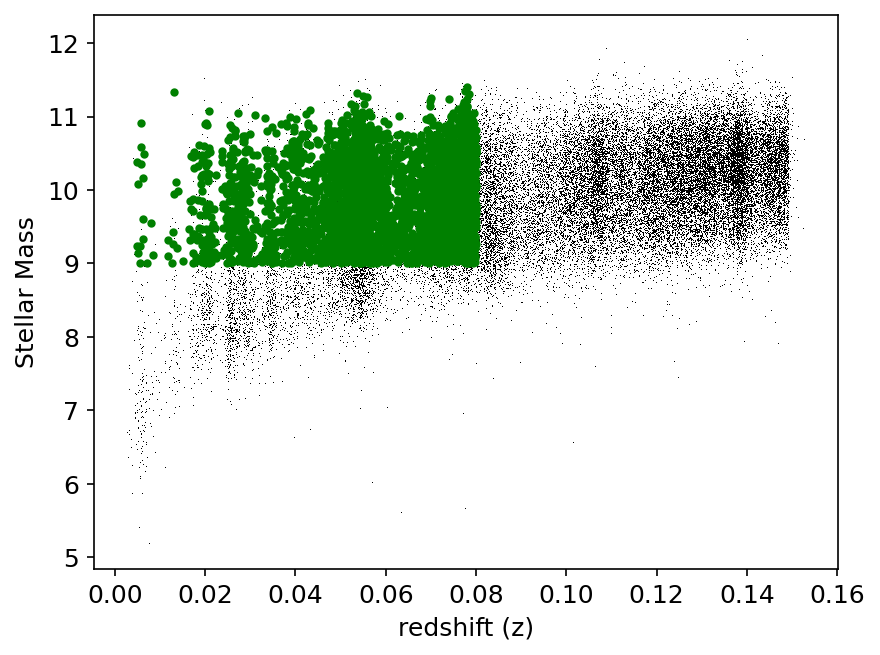

In [14]:
#Stellar mass vs Redshift for three-arm spirals
plt.plot(gama['Z'],np.log10(gama['mass_stellar_best_fit']),'k,')
plt.plot(gama['Z'][m0],np.log10(gama['mass_stellar_best_fit'])[m0],'g.')
plt.xlabel('redshift (z)')
plt.ylabel('Stellar Mass')

# Distance to 5th neighbour



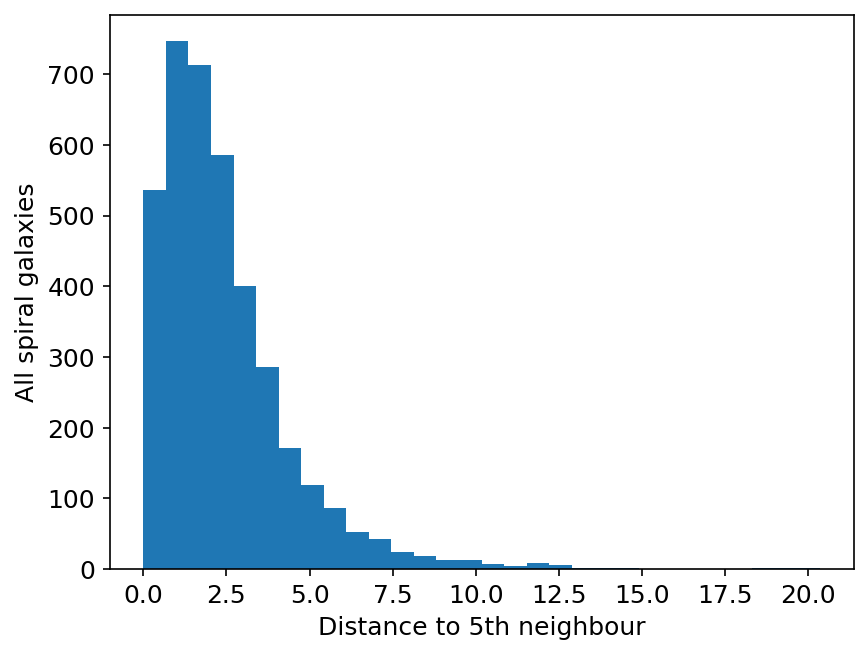

In [15]:
#Histogram for all spiral galaxies
plt.hist((gama2['DistanceTo5nn'])[m0],bins=30)
plt.ylabel('All spiral galaxies');
plt.xlabel('Distance to 5th neighbour');

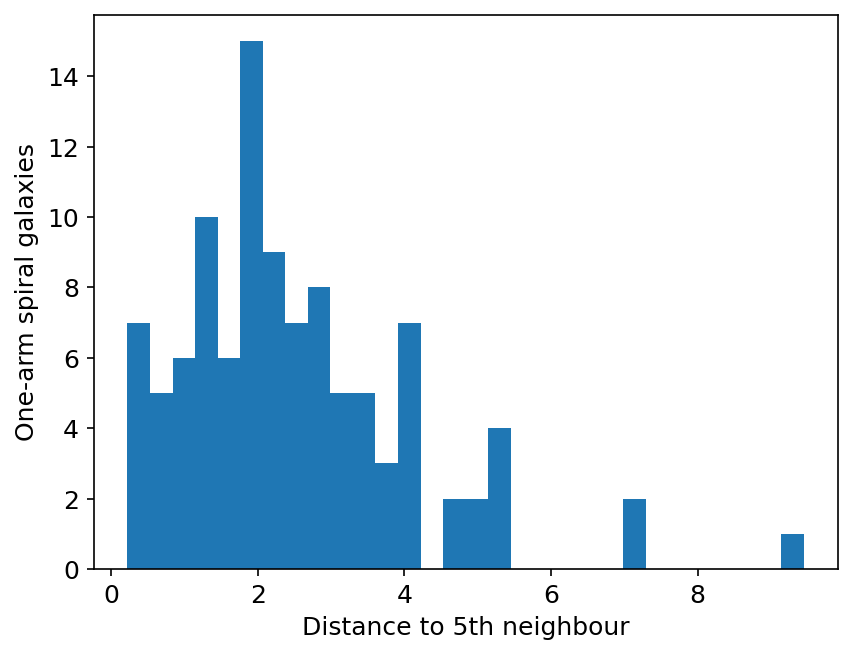

In [16]:
#Histogram for one-arm spiral galaxies
plt.hist((gama2['DistanceTo5nn'])[m1],bins=30)
plt.ylabel('One-arm spiral galaxies');
plt.xlabel('Distance to 5th neighbour');

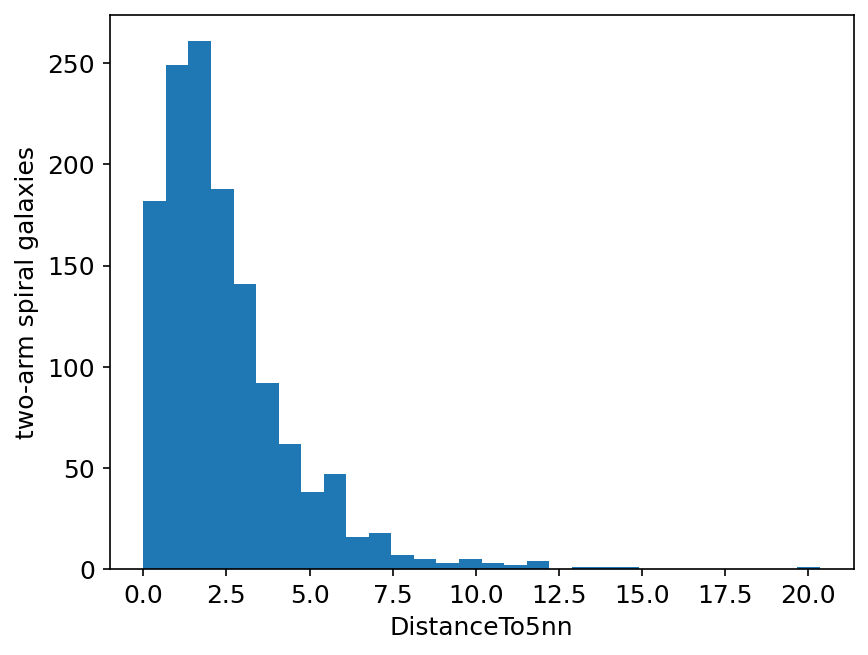

In [17]:
#Histogram for two-arm spiral galaxies
plt.hist((gama2['DistanceTo5nn'])[m2],bins=30)
plt.ylabel('two-arm spiral galaxies');
plt.xlabel('DistanceTo5nn');

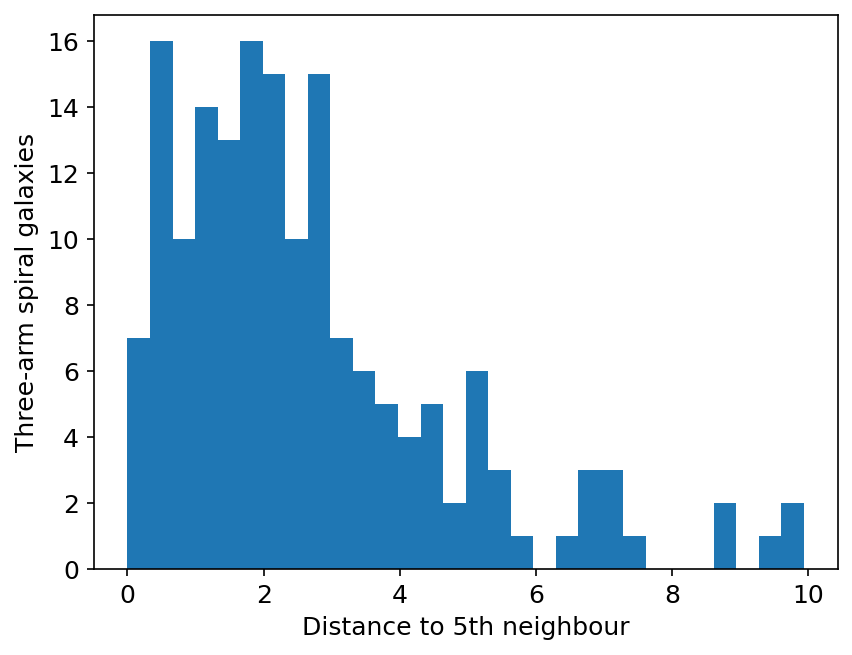

In [18]:
#Histogram for three-arm spiral galaxies
plt.hist((gama2['DistanceTo5nn'])[m3],bins=30)
plt.ylabel('Three-arm spiral galaxies');
plt.xlabel('Distance to 5th neighbour');

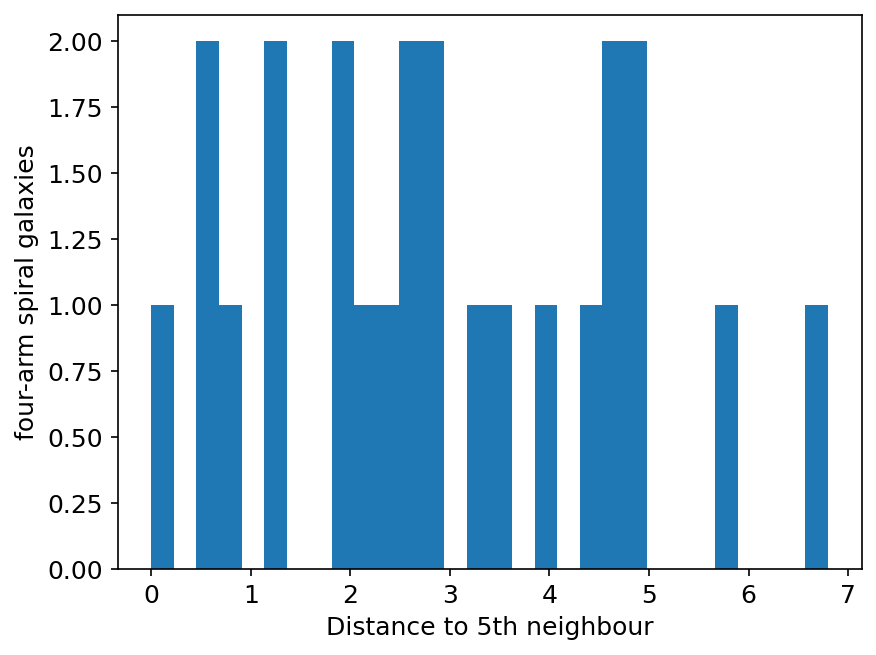

In [19]:
#Histogram for four-arm spiral galaxies
plt.hist((gama2['DistanceTo5nn'])[m4],bins=30)
plt.ylabel('four-arm spiral galaxies');
plt.xlabel('Distance to 5th neighbour');

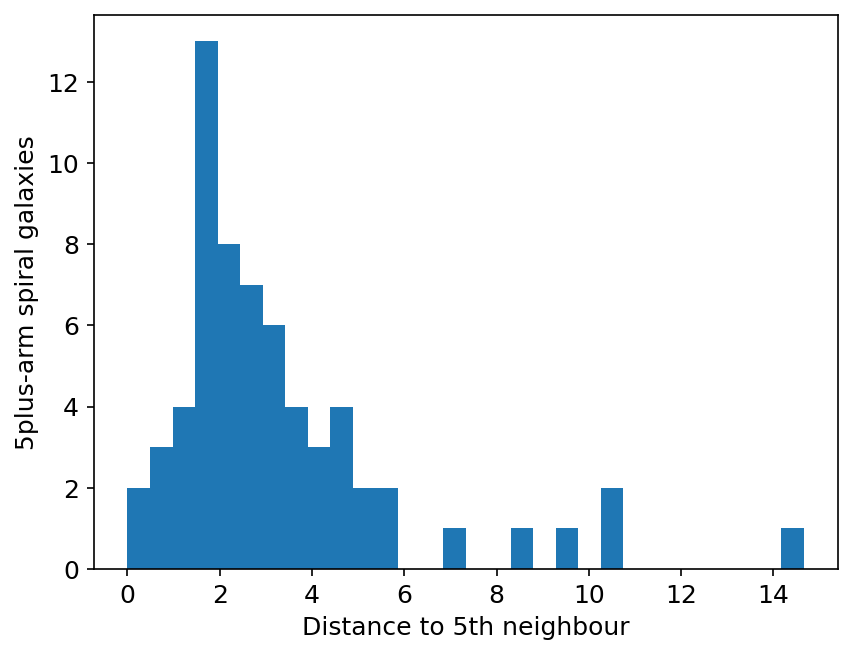

In [20]:
#Histogram for 5+-arm spiral galaxies
plt.hist((gama2['DistanceTo5nn'])[m5],bins=30)
plt.ylabel('5plus-arm spiral galaxies');
plt.xlabel('Distance to 5th neighbour');

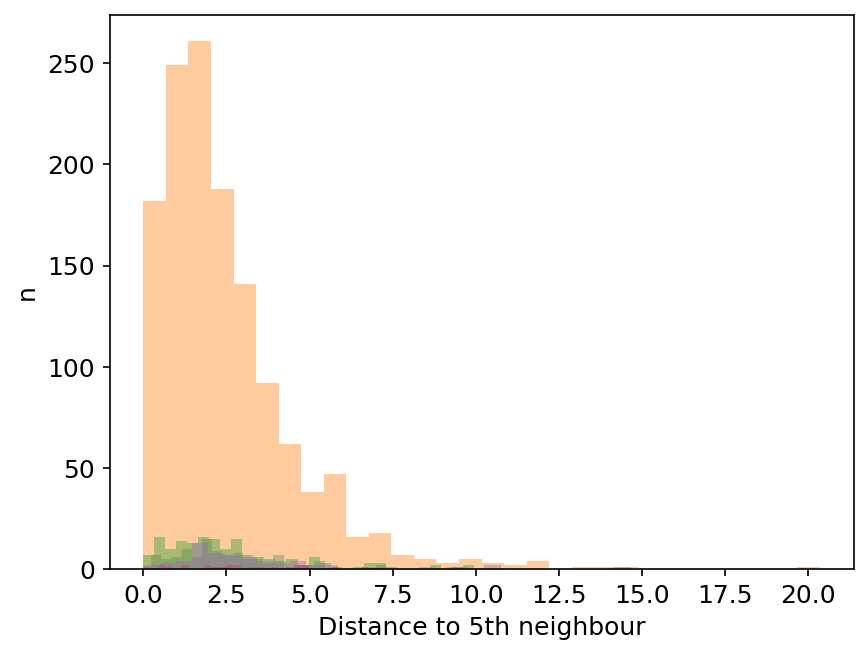

In [21]:
#Histograms combined
plt.hist((gama2['DistanceTo5nn'])[m1],bins=30, alpha = 0.4)
plt.hist((gama2['DistanceTo5nn'])[m2],bins=30, alpha = 0.4)
plt.hist((gama2['DistanceTo5nn'])[m3],bins=30, alpha = 0.4)
plt.hist((gama2['DistanceTo5nn'])[m4],bins=30, alpha = 0.4)
plt.hist((gama2['DistanceTo5nn'])[m5],bins=30, alpha = 0.4)
plt.ylabel('n');
plt.xlabel('Distance to 5th neighbour');

In [22]:
#Applying the Kolmogorov-Smirnov test
stats.ks_2samp((gama2['DistanceTo5nn'])[m0], (gama2['DistanceTo5nn'])[m3])

KstestResult(statistic=0.0714161835389723, pvalue=0.36642758404133735)

In [23]:
stats.ks_2samp((gama2['DistanceTo5nn'])[m03], (gama2['DistanceTo5nn'])[m3])

KstestResult(statistic=0.07644110275689223, pvalue=0.2944727324738272)

In [24]:
stats.ks_2samp((gama2['DistanceTo5nn'])[m1], (gama2['DistanceTo5nn'])[m3])

KstestResult(statistic=0.08012820512820513, pvalue=0.7675170857600869)

In [25]:
stats.ks_2samp((gama2['DistanceTo5nn'])[m2], (gama2['DistanceTo5nn'])[m3])

KstestResult(statistic=0.07316898123228191, pvalue=0.3814496181452358)

In [26]:
stats.ks_2samp((gama2['DistanceTo5nn'])[m0], (gama2['DistanceTo5nn'])[m2])

KstestResult(statistic=0.014683429955138102, pvalue=0.9810261436295576)

In [27]:
stats.ks_2samp((gama2['DistanceTo5nn'])[m1], (gama2['DistanceTo5nn'])[m01])

KstestResult(statistic=0.1341679328371662, pvalue=0.04861891431052001)

In [28]:
#Applying the Kolmogorov-Smirnov test part 2
stats.ks_2samp((gama2['DistanceTo5nn'])[m01], (gama2['DistanceTo5nn'])[m1])

KstestResult(statistic=0.1341679328371662, pvalue=0.04861891431052001)

In [29]:
stats.ks_2samp((gama2['DistanceTo5nn'])[m02], (gama2['DistanceTo5nn'])[m2])

KstestResult(statistic=0.019590450473080466, pvalue=0.9669280613728597)

In [30]:
stats.ks_2samp((gama2['DistanceTo5nn'])[m03], (gama2['DistanceTo5nn'])[m3])

KstestResult(statistic=0.07644110275689223, pvalue=0.2944727324738272)

In [31]:
stats.ks_2samp((gama2['DistanceTo5nn'])[m04], (gama2['DistanceTo5nn'])[m4])

KstestResult(statistic=0.24050632911392406, pvalue=0.10703064528839112)

In [32]:
stats.ks_2samp((gama2['DistanceTo5nn'])[m05], (gama2['DistanceTo5nn'])[m5])

KstestResult(statistic=0.23134003722887667, pvalue=0.001963007291159613)

# Surface Density



/Users/tharacaba/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  


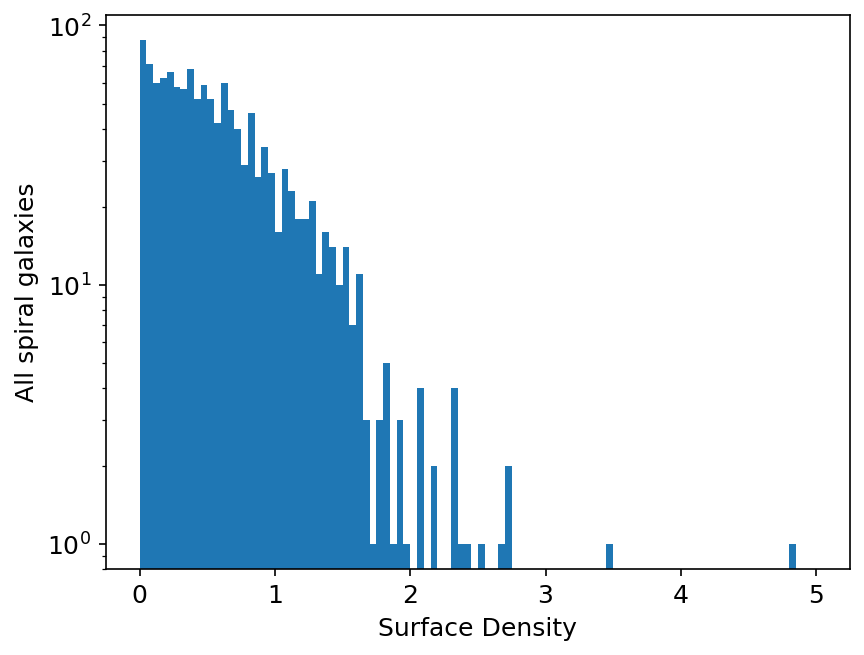

In [33]:
#Histogram for all spiral galaxies
plt.hist(np.log10(gama2['SurfaceDensity'])[m0],bins=100, range= [0,5],log=True)
plt.ylabel('All spiral galaxies');
plt.xlabel('Surface Density');

/Users/tharacaba/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  


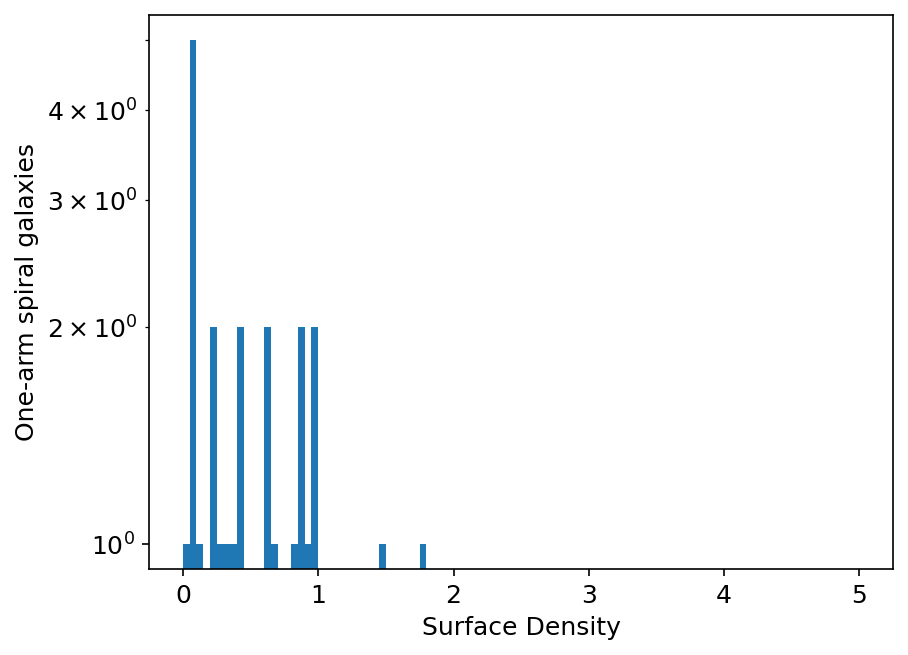

In [34]:
#Histogram for one-arm spiral galaxies
plt.hist(np.log10(gama2['SurfaceDensity'])[m1],bins=100, range= [0,5],log=True)
plt.ylabel('One-arm spiral galaxies');
plt.xlabel('Surface Density');

/Users/tharacaba/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  


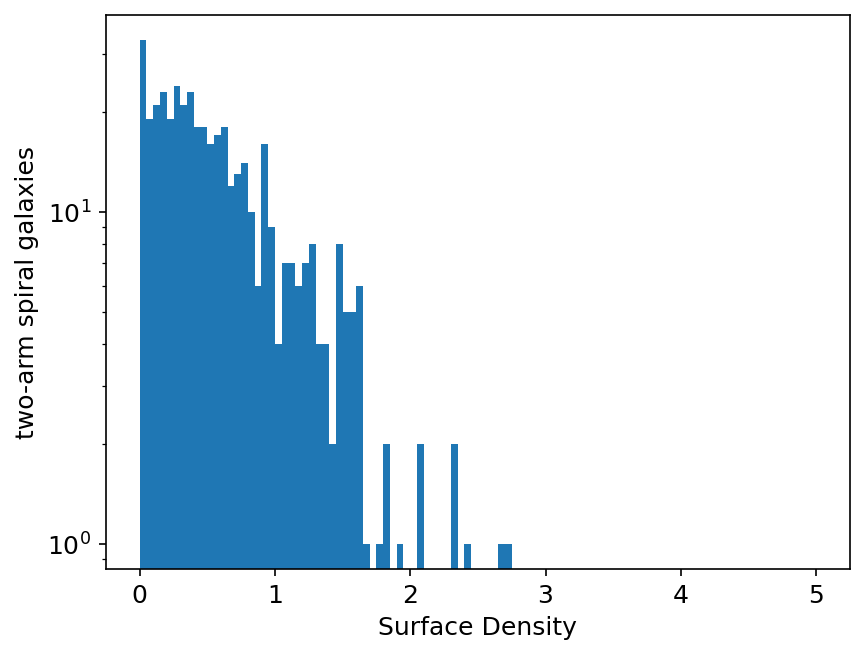

In [35]:
#Histogram for two-arm spiral galaxies
plt.hist(np.log10(gama2['SurfaceDensity'])[m2],bins=100, range= [0,5],log=True)
plt.ylabel('two-arm spiral galaxies');
plt.xlabel('Surface Density');

/Users/tharacaba/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  


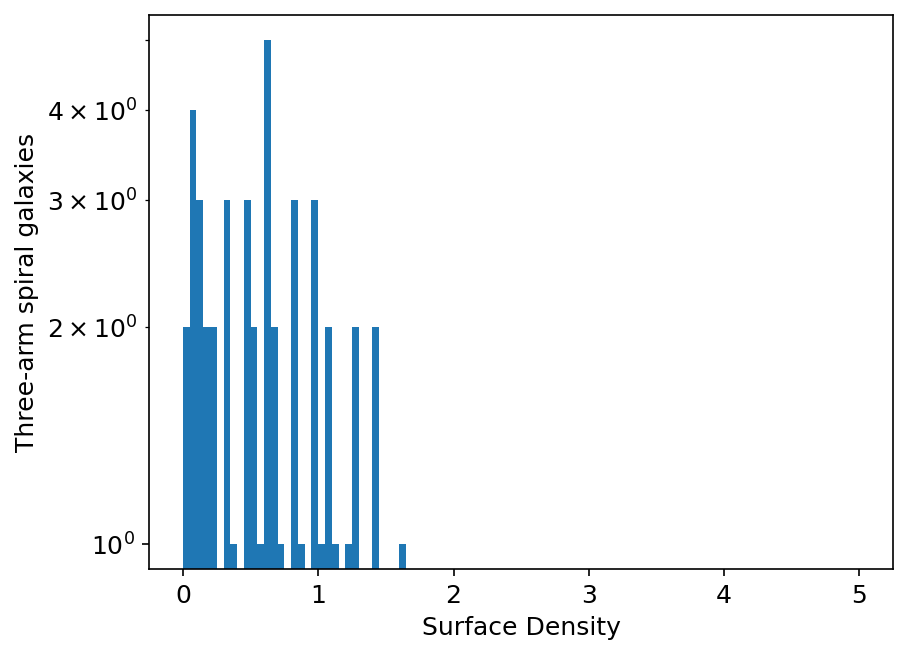

In [36]:
#Histogram for three-arm spiral galaxies
plt.hist(np.log10(gama2['SurfaceDensity'])[m3],bins=100, range= [0,5],log=True)
plt.ylabel('Three-arm spiral galaxies');
plt.xlabel('Surface Density');

/Users/tharacaba/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  


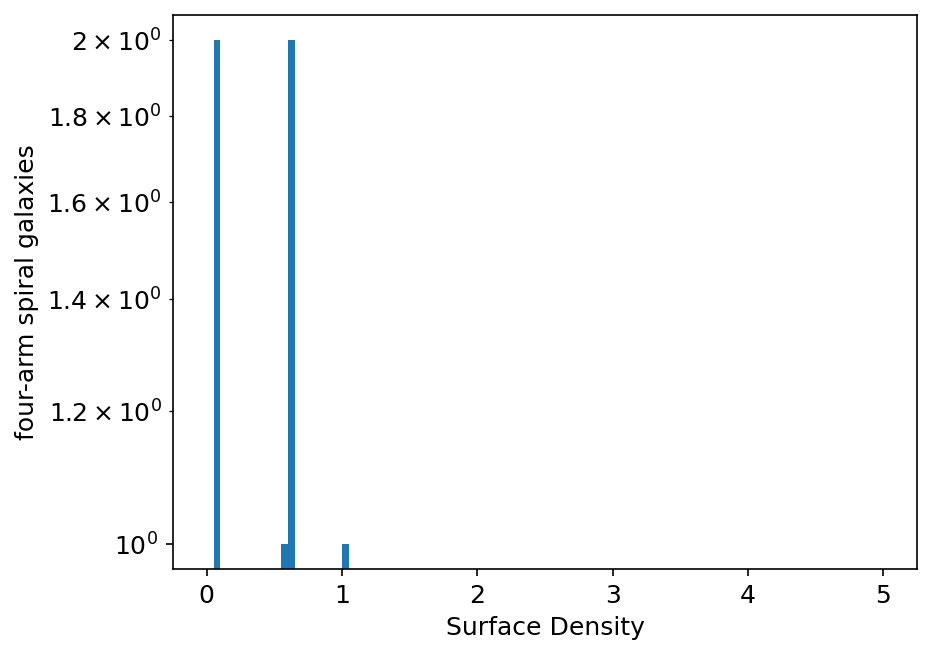

In [37]:
#Histogram for four-arm spiral galaxies
plt.hist(np.log10(gama2['SurfaceDensity'])[m4],bins=100, range= [0,5],log=True)
plt.ylabel('four-arm spiral galaxies');
plt.xlabel('Surface Density');

/Users/tharacaba/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  


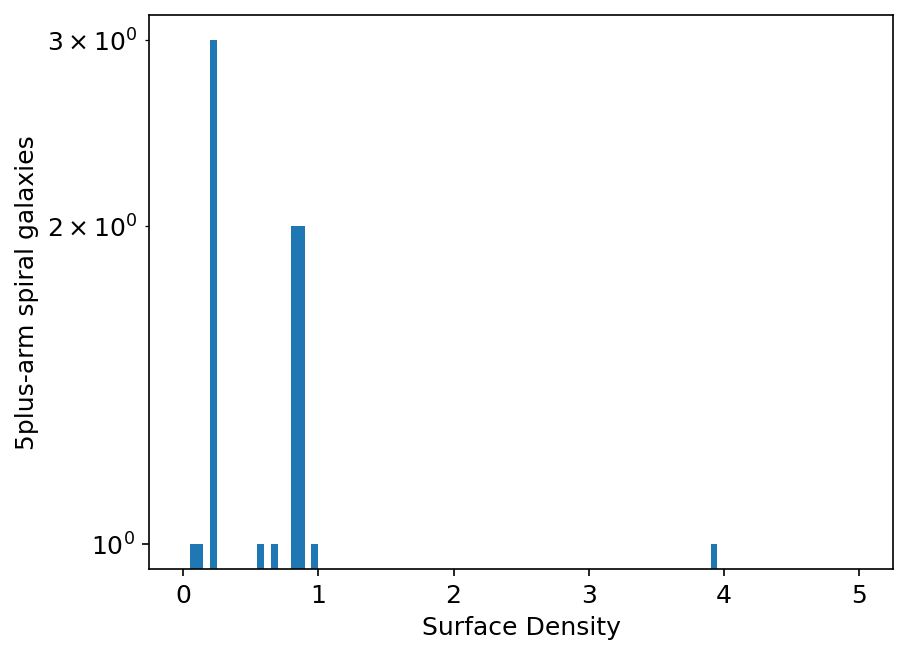

In [38]:
#Histogram for 5plus-arm spiral galaxies
plt.hist(np.log10(gama2['SurfaceDensity'])[m5],bins=100, range= [0,5],log=True)
plt.ylabel('5plus-arm spiral galaxies');
plt.xlabel('Surface Density');

/Users/tharacaba/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  
/Users/tharacaba/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/tharacaba/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log10
  after removing the cwd from sys.path.
/Users/tharacaba/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log10
  """
/Users/tharacaba/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log10
  


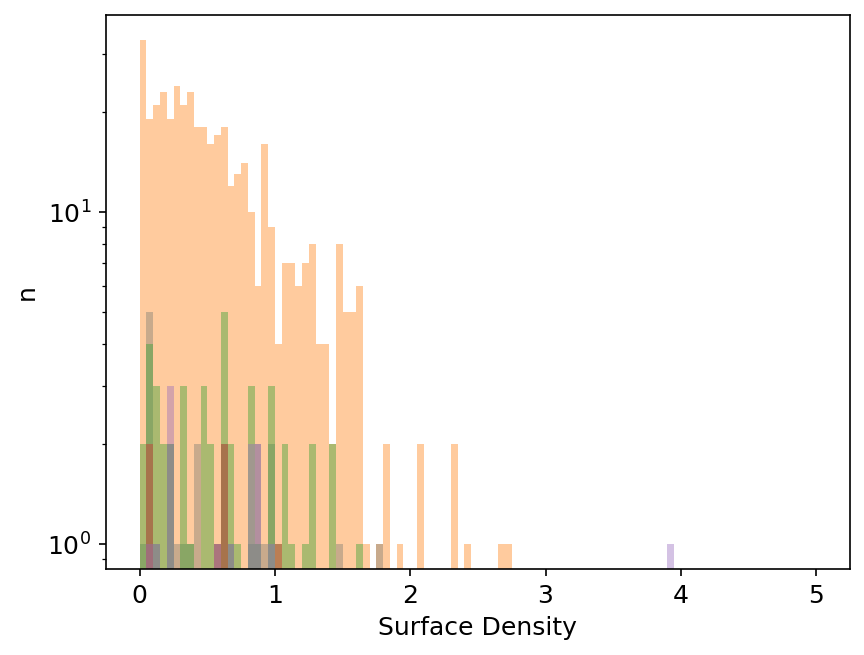

In [39]:
#Histograms combined
plt.hist(np.log10(gama2['SurfaceDensity'])[m1],bins=100, range= [0,5],log=True, alpha = 0.4)
plt.hist(np.log10(gama2['SurfaceDensity'])[m2],bins=100, range= [0,5],log=True, alpha = 0.4)
plt.hist(np.log10(gama2['SurfaceDensity'])[m3],bins=100, range= [0,5],log=True, alpha = 0.4)
plt.hist(np.log10(gama2['SurfaceDensity'])[m4],bins=100, range= [0,5],log=True, alpha = 0.4)
plt.hist(np.log10(gama2['SurfaceDensity'])[m5],bins=100, range= [0,5],log=True, alpha = 0.4)
plt.ylabel('n');
plt.xlabel('Surface Density');

In [40]:
#Applying the Kolmogorov-Smirnov test
stats.ks_2samp((gama2['SurfaceDensity'])[m1], (gama2['SurfaceDensity'])[m3])

KstestResult(statistic=0.08608058608058608, pvalue=0.6889107225045893)

In [41]:
stats.ks_2samp((gama2['SurfaceDensity'])[m2], (gama2['SurfaceDensity'])[m3])

KstestResult(statistic=0.06992589801557397, pvalue=0.43750646541930205)

In [42]:
stats.ks_2samp((gama2['SurfaceDensity'])[m1], (gama2['SurfaceDensity'])[m0])

KstestResult(statistic=0.11768590410629953, pvalue=0.11140217234745975)

In [43]:
stats.ks_2samp((gama2['SurfaceDensity'])[m0], (gama2['SurfaceDensity'])[m3])

KstestResult(statistic=0.07362742183241663, pvalue=0.33049868693413964)

In [44]:
stats.ks_2samp((gama2['SurfaceDensity'])[m0], (gama2['SurfaceDensity'])[m2])

KstestResult(statistic=0.01595965330637908, pvalue=0.9588592894339694)

In [45]:
stats.ks_2samp((gama2['SurfaceDensity'])[m3], (gama2['SurfaceDensity'])[m03])

KstestResult(statistic=0.07978411217918213, pvalue=0.24906174494654254)

In [46]:
stats.ks_2samp((gama2['SurfaceDensity'])[m1], (gama2['SurfaceDensity'])[m01])

KstestResult(statistic=0.12086992351471762, pvalue=0.09733352050977806)

In [47]:
#Applying the Kolmogorov-Smirnov test part 2
stats.ks_2samp((gama2['SurfaceDensity'])[m01], (gama2['SurfaceDensity'])[m1])

KstestResult(statistic=0.12086992351471762, pvalue=0.09733352050977806)

In [48]:
stats.ks_2samp((gama2['SurfaceDensity'])[m02], (gama2['SurfaceDensity'])[m2])

KstestResult(statistic=0.03296387004940132, pvalue=0.5002955663744373)

In [49]:
stats.ks_2samp((gama2['SurfaceDensity'])[m03], (gama2['SurfaceDensity'])[m3])

KstestResult(statistic=0.07978411217918213, pvalue=0.24906174494654254)

In [50]:
stats.ks_2samp((gama2['SurfaceDensity'])[m04], (gama2['SurfaceDensity'])[m4])

KstestResult(statistic=0.22341772151898734, pvalue=0.15886399132847728)

In [51]:
stats.ks_2samp((gama2['SurfaceDensity'])[m05], (gama2['SurfaceDensity'])[m5])

KstestResult(statistic=0.14156078018776302, pvalue=0.14679719984726636)

# Count In Cylinder



/Users/tharacaba/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  
/Users/tharacaba/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  


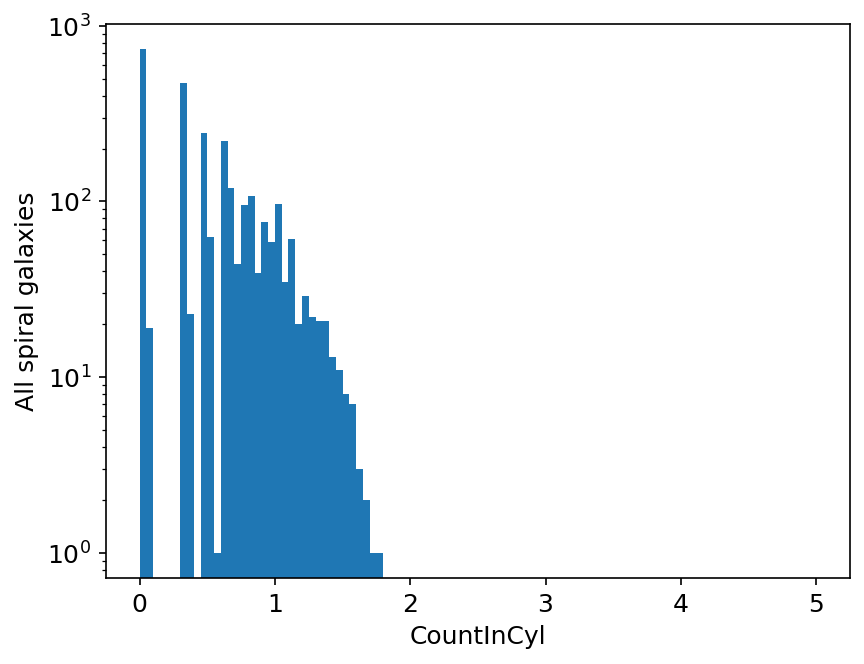

In [52]:
#Histogram for all spiral galaxies
plt.hist(np.log10(gama2['CountInCyl'])[m0],bins=100, range= [0,5],log=True)
plt.ylabel('All spiral galaxies');
plt.xlabel('CountInCyl');

/Users/tharacaba/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  
/Users/tharacaba/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  


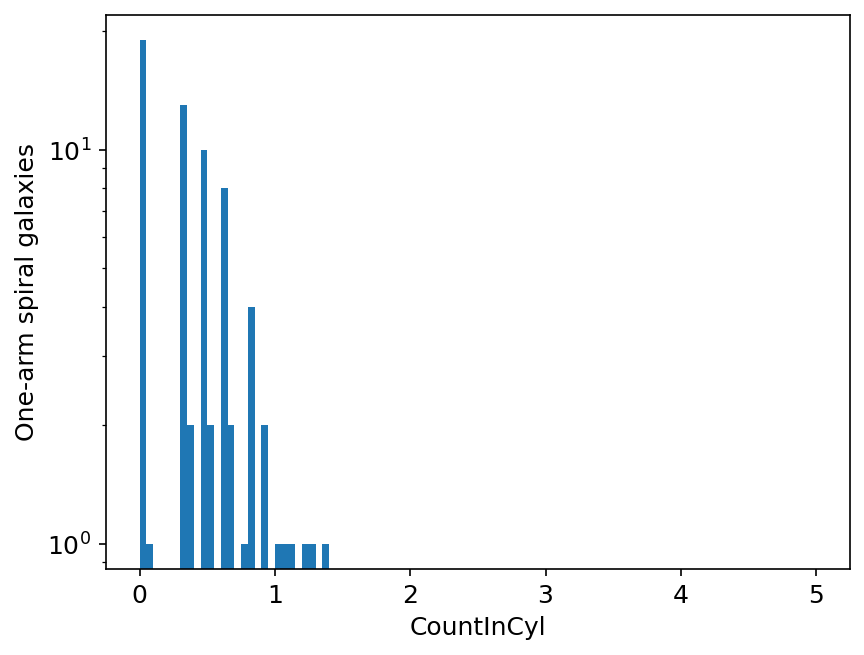

In [53]:
#Histogram for one-arm spiral galaxies
plt.hist(np.log10(gama2['CountInCyl'])[m1],bins=100, range= [0,5],log=True)
plt.ylabel('One-arm spiral galaxies');
plt.xlabel('CountInCyl');

/Users/tharacaba/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  
/Users/tharacaba/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  


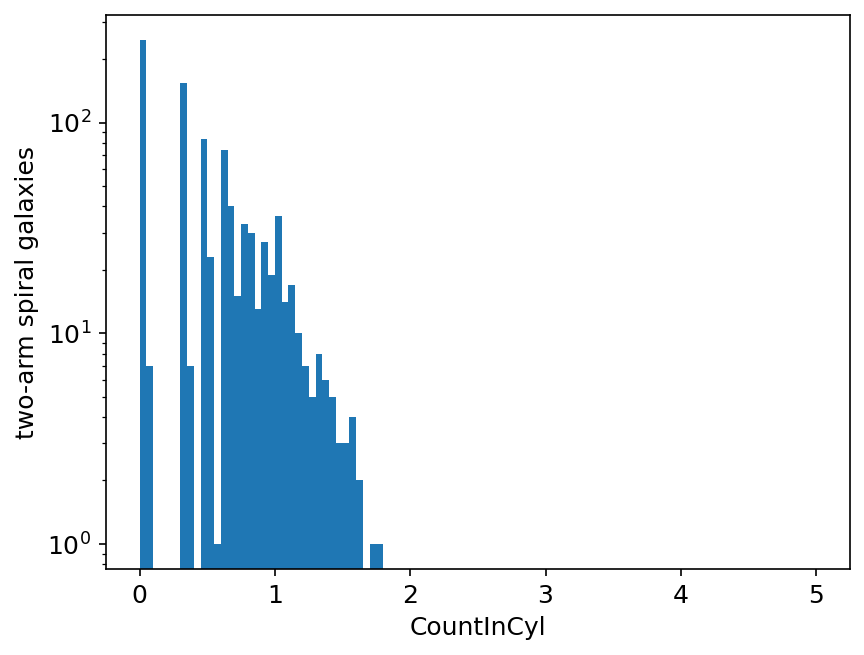

In [54]:
#Histogram for two-arm spiral galaxies
plt.hist(np.log10(gama2['CountInCyl'])[m2],bins=100, range= [0,5],log=True)
plt.ylabel('two-arm spiral galaxies');
plt.xlabel('CountInCyl');

/Users/tharacaba/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  
/Users/tharacaba/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  


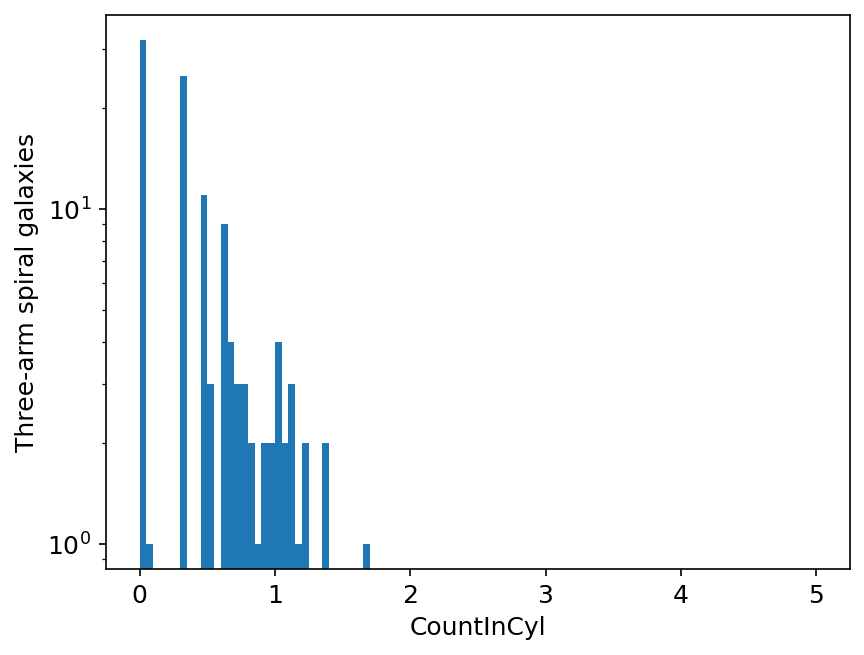

In [55]:
#Histogram for three-arm spiral galaxies
plt.hist(np.log10(gama2['CountInCyl'])[m3],bins=100, range= [0,5],log=True)
plt.ylabel('Three-arm spiral galaxies');
plt.xlabel('CountInCyl');

/Users/tharacaba/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  
/Users/tharacaba/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  


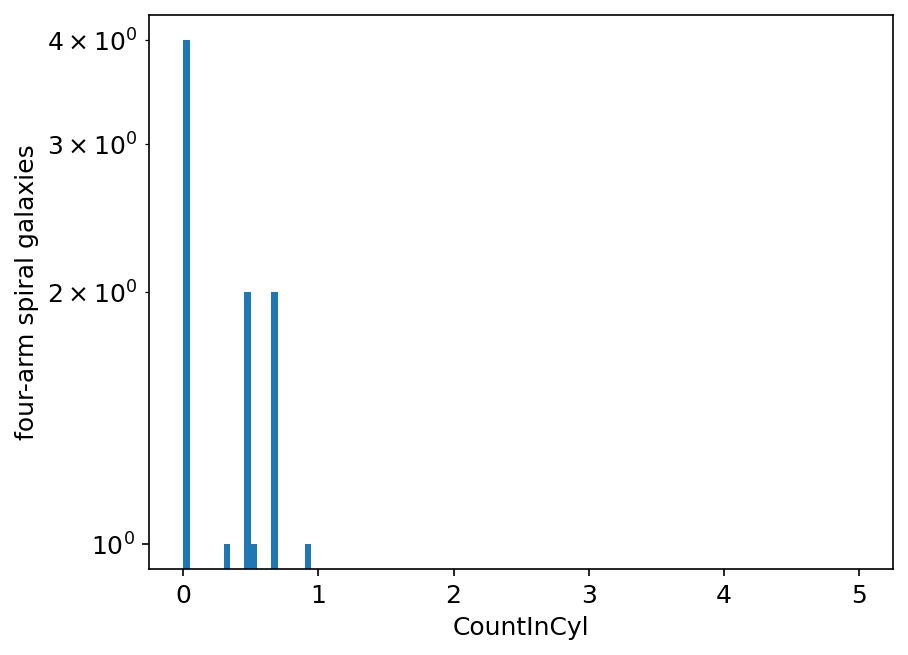

In [56]:
#Histogram for four-arm spiral galaxies
plt.hist(np.log10(gama2['CountInCyl'])[m4],bins=100, range= [0,5],log=True)
plt.ylabel('four-arm spiral galaxies');
plt.xlabel('CountInCyl');

/Users/tharacaba/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  
/Users/tharacaba/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  


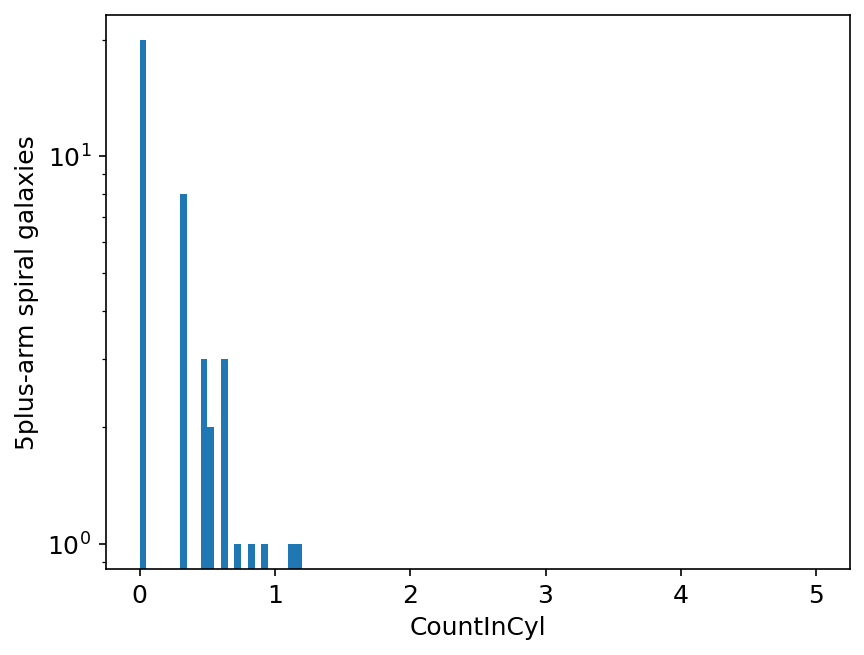

In [57]:
#Histogram for 5plus-arm spiral galaxies
plt.hist(np.log10(gama2['CountInCyl'])[m5],bins=100, range= [0,5],log=True)
plt.ylabel('5plus-arm spiral galaxies');
plt.xlabel('CountInCyl');

/Users/tharacaba/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  
/Users/tharacaba/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  
/Users/tharacaba/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/tharacaba/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/tharacaba/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.
/Users/tharacaba/opt/anaconda3/e

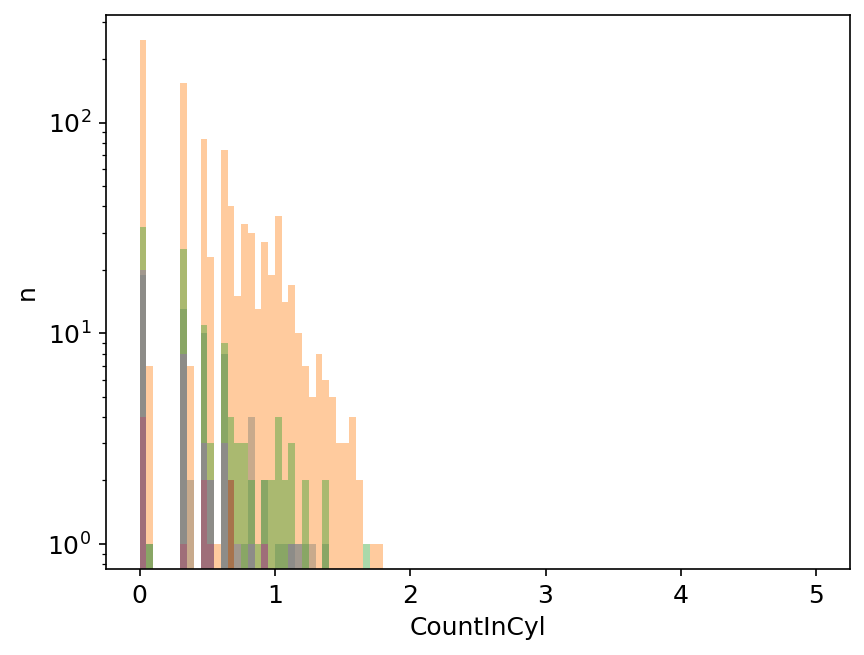

In [58]:
#Histograms combined
plt.hist(np.log10(gama2['CountInCyl'])[m1],bins=100, range= [0,5], log=True, alpha = 0.4)
plt.hist(np.log10(gama2['CountInCyl'])[m2],bins=100, range= [0,5], log=True, alpha = 0.4)
plt.hist(np.log10(gama2['CountInCyl'])[m3],bins=100, range= [0,5], log=True, alpha = 0.4)
plt.hist(np.log10(gama2['CountInCyl'])[m4],bins=100, range= [0,5], log=True, alpha = 0.4)
plt.hist(np.log10(gama2['CountInCyl'])[m5],bins=100, range= [0,5], log=True, alpha = 0.4)
plt.ylabel('n');
plt.xlabel('CountInCyl');

In [59]:
#Applying the Kolmogorov-Smirnov test
stats.ks_2samp((gama2['CountInCyl'])[m1], (gama2['CountInCyl'])[m3])

KstestResult(statistic=0.07417582417582418, pvalue=0.8399030809230349)

In [60]:
stats.ks_2samp((gama2['CountInCyl'])[m2], (gama2['CountInCyl'])[m3])

KstestResult(statistic=0.045555675171349626, pvalue=0.9005708722337112)

In [61]:
stats.ks_2samp((gama2['CountInCyl'])[m0], (gama2['CountInCyl'])[m3])

KstestResult(statistic=0.05391209553540459, pvalue=0.7160299716765868)

In [62]:
stats.ks_2samp((gama2['CountInCyl'])[m0], (gama2['CountInCyl'])[m2])

KstestResult(statistic=0.019381735459875617, pvalue=0.8436426357080528)

In [63]:
stats.ks_2samp((gama2['CountInCyl'])[m1], (gama2['CountInCyl'])[m01])

KstestResult(statistic=0.09513983672838712, pvalue=0.3027914024119357)

In [64]:
stats.ks_2samp((gama2['CountInCyl'])[m3], (gama2['CountInCyl'])[m03])

KstestResult(statistic=0.05607372862536087, pvalue=0.6766248975254336)

In [65]:
#Applying the Kolmogorov-Smirnov test part 2
stats.ks_2samp((gama2['CountInCyl'])[m01], (gama2['CountInCyl'])[m1])

KstestResult(statistic=0.09513983672838712, pvalue=0.3027914024119357)

In [66]:
stats.ks_2samp((gama2['CountInCyl'])[m02], (gama2['CountInCyl'])[m2])

KstestResult(statistic=0.02791776563677468, pvalue=0.707818664618177)

In [67]:
stats.ks_2samp((gama2['CountInCyl'])[m03], (gama2['CountInCyl'])[m3])

KstestResult(statistic=0.05607372862536087, pvalue=0.6766248975254336)

In [68]:
stats.ks_2samp((gama2['CountInCyl'])[m04], (gama2['CountInCyl'])[m4])

KstestResult(statistic=0.24092827004219408, pvalue=0.10595075017810418)

In [69]:
stats.ks_2samp((gama2['CountInCyl'])[m05], (gama2['CountInCyl'])[m5])

KstestResult(statistic=0.18040830365814178, pvalue=0.029412331086522747)